<a href="https://colab.research.google.com/github/nitaymayo/My_Portfolio/blob/main/AI/Tensorflow/Transfer_Learning/Transfer_Learning_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning - Fine Tuning

## helper functions

In [ ]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-12-23 14:43:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-12-23 14:43:35 (89.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## get the data

In [ ]:
# Download data
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2022-12-23 14:43:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   145MB/s    in 1.1s    

2022-12-23 14:43:39 (145 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
# Dataset creation
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Models

### Model 0: Baseline

In [ ]:
# Creating, Compiling and trainig the baseline model

base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,), name="input_layer")

x = base_model(inputs)
print(f"shape after passing inputs througe base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D()(x)
print(f"shape after passing througe global avg pooling: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_0 = model_0.fit(train_data_10_percent, 
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                              experiment_name="10_percent_feature_extraction")],
                        epochs=5)

16705208/16705208 [==============================] - 0s 0us/step
shape after passing inputs througe base model: (None, 7, 7, 1280)
shape after passing througe global avg pooling: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20221223-144349
Epoch 1/5
24/24 [==============================] - 24s 265ms/step - loss: 1.8675 - accuracy: 0.4253 - val_loss: 1.3184 - val_accuracy: 0.7220
Epoch 2/5
24/24 [==============================] - 4s 162ms/step - loss: 1.1005 - accuracy: 0.7827 - val_loss: 0.8533 - val_accuracy: 0.8257
Epoch 3/5
24/24 [==============================] - 5s 195ms/step - loss: 0.7859 - accuracy: 0.8320 - val_loss: 0.6992 - val_accuracy: 0.8487
Epoch 4/5
24/24 [==============================] - 4s 162ms/step - loss: 0.6422 - accuracy: 0.8613 - val_loss: 0.5916 - val_accuracy: 0.8701
Epoch 5/5
24/24 [==============================] - 5s 186ms/step - loss: 0.5547 - accuracy: 0.8773 - val_loss: 0.5377 - val_accuracy: 0.8783


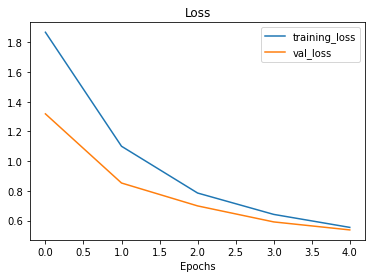

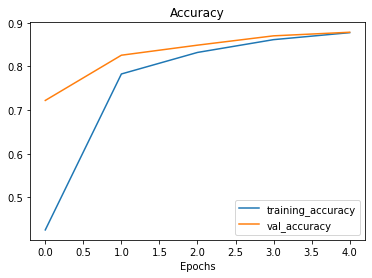

In [ ]:
plot_loss_curves(history_0)

### model 1:

#### download data:

In [ ]:
# Get the data for this model, 1 precent of the whole dataset
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

walk_through_dir("10_food_classes_1_percent")

--2022-12-23 14:44:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 142.250.99.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  85.3MB/s    in 1.5s    

2022-12-23 14:44:41 (85.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classe

####prep data:

In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir_1_percent = "10_food_classes_1_percent/test"

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.


#### model bulding:

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
# Building augmentation layer
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
], name="data_augmentation")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

def check_augmentation(augmentation_model):
  plt.figure(figsize=(15,15))

  target_class = random.choice(train_data_1_percent.class_names)
  target_dir = train_dir_1_percent + "/" + target_class

  img = random.choice(os.listdir(target_dir))
  img = mpimg.imread(target_dir + "/" + img)
  plt.subplot(1, 2, 1)
  plt.title(f"{target_class} not augmented")
  plt.imshow(img)

  plt.subplot(1, 2, 2)
  plt.title(f"{target_class} augmented")
  aug_img = augmentation_model(img, training=True)/255.
  plt.imshow(aug_img)

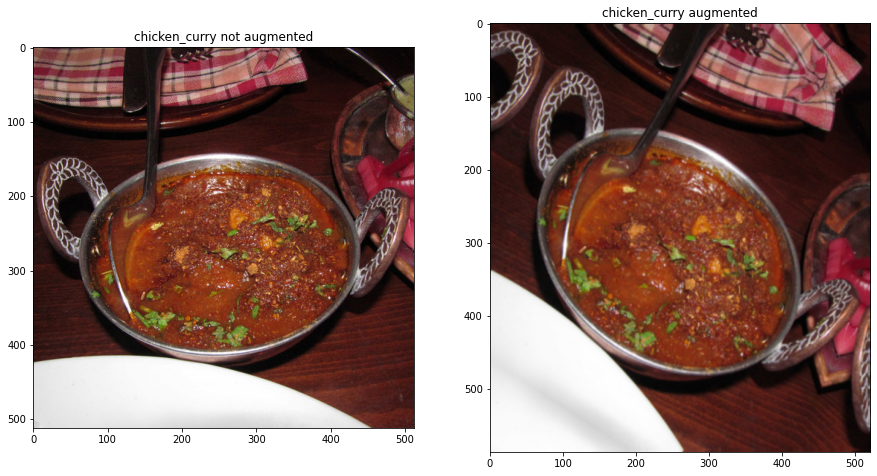

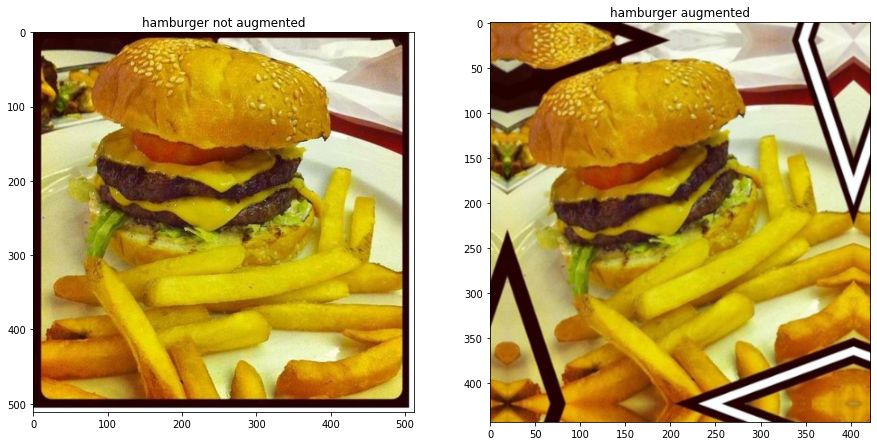

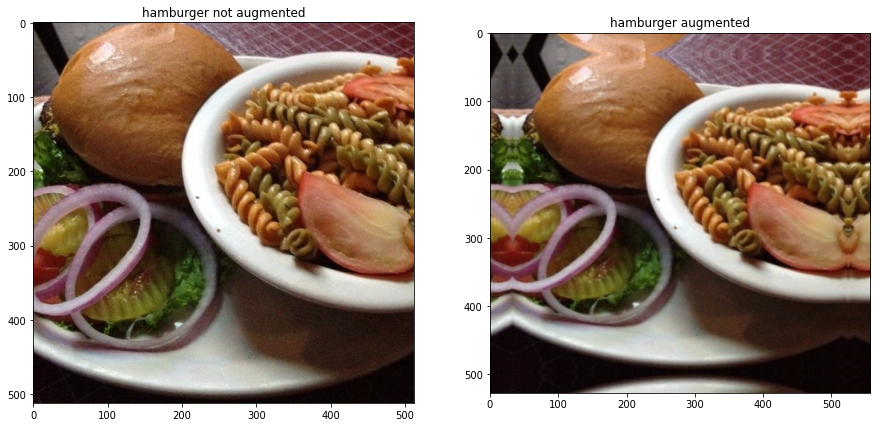

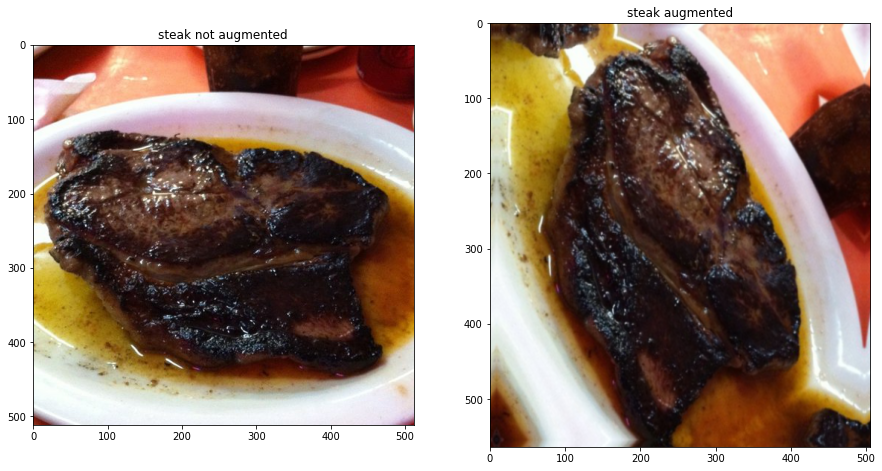

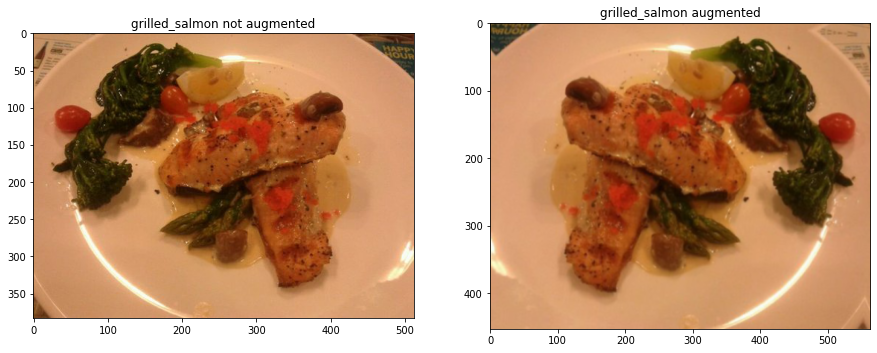

In [ ]:
for _ in range(5):
  check_augmentation(data_augmentation)

In [ ]:
# Building, Compiling and trainig the model
base_model1 = tf.keras.applications.EfficientNetB0(include_top=False)

base_model1.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,))

x = data_augmentation(inputs)

x = base_model1(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="1_percent_feature_extraction")])

Saving TensorBoard log files to: transfer_learning/1_percent_feature_extraction/20221223-144448
Epoch 1/5


3/3 [==============================] - ETA: 0s - loss: 2.3903 - accuracy: 0.1000

3/3 [==============================] - 11s 2s/step - loss: 2.3903 - accuracy: 0.1000 - val_loss: 2.2919 - val_accuracy: 0.1530
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1747 - accuracy: 0.1857 - val_loss: 2.1788 - val_accuracy: 0.1957
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9563 - accuracy: 0.3857 - val_loss: 2.0706 - val_accuracy: 0.2944
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7748 - accuracy: 0.5714 - val_loss: 1.9563 - val_accuracy: 0.3865
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6132 - accuracy: 0.7000 - val_loss: 1.8604 - val_accuracy: 0.4211


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

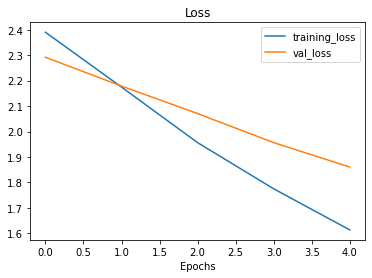

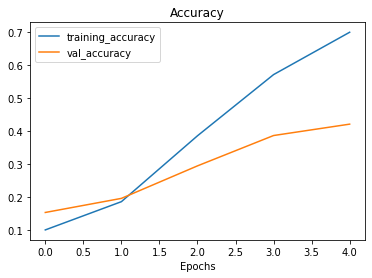

In [ ]:
model_1.summary()
plot_loss_curves(history_1)

### model 2: data augmentation

#### model build:

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation_2 = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
], name="augmentation_layer")

base_model_2 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_2.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE+(3,), name="input_layer")

x = data_augmentation_2(inputs, training=True)
x = base_model_2(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

checkpoint_path = "checkpoints_weights/model2.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

history_2 = model_2.fit(train_data_10_percent,
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[checkpoint_callback, create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent_feature_extraction_augmented")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction_augmented/20221223-144527
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0212 - accuracy: 0.3640
Epoch 1: val_loss improved from inf to 1.57328, saving model to checkpoints_weights/model2.ckpt
24/24 [==============================] - 30s 961ms/step - loss: 2.0212 - accuracy: 0.3640 - val_loss: 1.5733 - val_accuracy: 0.5970
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3596 - accuracy: 0.6787
Epoch 2: val_loss improved from 1.57328 to 1.13746, saving model to checkpoints_weights/model2.ckpt
24/24 [==============================] - 15s 624ms/step - loss: 1.3596 - accuracy: 0.6787 - val_loss: 1.1375 - val_accuracy: 0.7204
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0308 - accuracy: 0.7640
Epoch 3: val_loss improved from 1.13746 to 0.95225, saving model to checkpoints_weights/model2.ckpt
24/24 [==============================] - 17s 722ms/ste

### model 3: Fine tuning model 2

In [ ]:
base_model_2.trainable = True

for layer in base_model_2.layers[:-10]:
  layer.trainable = False

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])



In [ ]:
for i, layer in enumerate(model_2.layers):
  print(i, layer.name, layer.trainable)

0 input_layer True
1 augmentation_layer True
2 efficientnetb0 True
3 global_average_pooling2d_2 True
4 dense_1 True


In [ ]:
print(len(base_model_2.trainable_variables))
print(len(model_2.layers[2].trainable_variables))

10
10


In [ ]:
initial_epochs = 5

fine_tune_epochs = initial_epochs + 5

history_3 = model_2.fit(train_data_10_percent,
                        epochs=fine_tune_epochs,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch=history_2.epoch[-1],
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20221223-144718
Epoch 5/10
24/24 [==============================] - 27s 822ms/step - loss: 0.8217 - accuracy: 0.7800 - val_loss: 0.6786 - val_accuracy: 0.8207
Epoch 6/10
24/24 [==============================] - 12s 493ms/step - loss: 0.6560 - accuracy: 0.8440 - val_loss: 0.6233 - val_accuracy: 0.8339
Epoch 7/10
24/24 [==============================] - 12s 477ms/step - loss: 0.5835 - accuracy: 0.8787 - val_loss: 0.6210 - val_accuracy: 0.8224
Epoch 8/10
24/24 [==============================] - 11s 430ms/step - loss: 0.5438 - accuracy: 0.8573 - val_loss: 0.5468 - val_accuracy: 0.8438
Epoch 9/10
24/24 [==============================] - 10s 426ms/step - loss: 0.5144 - accuracy: 0.8720 - val_loss: 0.5481 - val_accuracy: 0.8289
Epoch 10/10
24/24 [==============================] - 11s 454ms/step - loss: 0.4830 - accuracy: 0.8680 - val_loss: 0.5491 - val_accuracy: 0.8372


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 19s 238ms/step - loss: 0.5502 - accuracy: 0.8384


[0.5501769781112671, 0.8384000062942505]

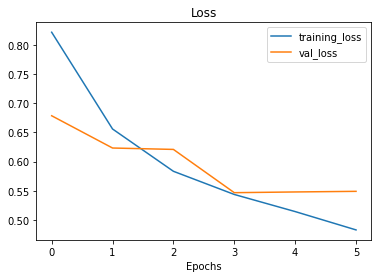

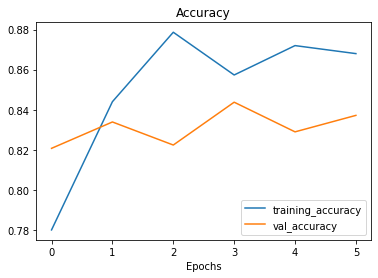

In [ ]:
plot_loss_curves(history_3)

### model 4: trainig a model on the whole data

In [ ]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")

--2022-12-23 14:49:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   173MB/s    in 2.9s    

2022-12-23 14:49:26 (173 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir_all_data = "10_food_classes_all_data/train"

walk_through_dir(train_dir_all_data)

There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.


In [ ]:
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.


In [ ]:
model_2.load_weights(checkpoint_path)

#### fine tunning the model

In [ ]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
! rm -r transfer_learning/fine_tune_all_data

rm: cannot remove 'transfer_learning/fine_tune_all_data': No such file or directory


In [ ]:
fine_tune_epochs = initial_epochs + 5

history_4 = model_2.fit(train_data_10_classes_full,
                        epochs=fine_tune_epochs,
                        initial_epoch=history_2.epoch[-1],
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        batch_size=BATCH_SIZE,
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="fine_tune_all_data")])

Saving TensorBoard log files to: transfer_learning/fine_tune_all_data/20221223-154256
Epoch 5/10
235/235 [==============================] - 46s 166ms/step - loss: 0.7664 - accuracy: 0.7721 - val_loss: 0.4630 - val_accuracy: 0.8602
Epoch 6/10
235/235 [==============================] - 38s 161ms/step - loss: 0.5829 - accuracy: 0.8219 - val_loss: 0.3845 - val_accuracy: 0.8914
Epoch 7/10
235/235 [==============================] - 36s 151ms/step - loss: 0.5198 - accuracy: 0.8361 - val_loss: 0.3761 - val_accuracy: 0.8816
Epoch 8/10
235/235 [==============================] - 36s 150ms/step - loss: 0.4662 - accuracy: 0.8539 - val_loss: 0.3356 - val_accuracy: 0.8750
Epoch 9/10
235/235 [==============================] - 35s 149ms/step - loss: 0.4373 - accuracy: 0.8616 - val_loss: 0.3486 - val_accuracy: 0.8914
Epoch 10/10
235/235 [==============================] - 37s 154ms/step - loss: 0.4135 - accuracy: 0.8700 - val_loss: 0.3183 - val_accuracy: 0.8980


In [ ]:
result_fine_tune_full_data = model_2.evaluate(test_data)
result_fine_tune_full_data

79/79 [==============================] - 14s 151ms/step - loss: 0.3283 - accuracy: 0.8992


[0.3282512426376343, 0.8992000222206116]

## Tensorboard

In [ ]:
! tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments" \
  --description "tensorflow learning course asignment" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/b0V4jpoDS9SmrWSGwEyPOQ/

[2022-12-23T15:47:53] Started scanning logdir.
[2022-12-23T15:47:58] Total uploaded: 162 scalars, 0 tensors, 5 binary objects (4.3 MB)
[2022-12-23T15:47:58] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/b0V4jpoDS9SmrWSGwEyPOQ/
